In [5]:
#Data Visulisation

#Packages in Python for plotting

import pandas as pd
import numpy as np
import sys 
np.set_printoptions(precision=4)

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.





In [2]:
# Importing the parallel_coordinates from pandas.plotting which will help in plotting the Parallel Coordinates.

from pandas.plotting import parallel_coordinates

In [11]:
sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

In [12]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: plotly in /Users/gayatripatil/Library/Python/2.7/lib/python/site-packages (4.14.3)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


In [5]:
df_mcd=pd.read_excel('https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_india_menu.xlsx')
print('Data shape',df_mcd.shape)
df_mcd.head()

Data shape (83, 14)


,Category,Item,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,High_Or_Low_Sugar
0,Breakfast,Egg & Cheese Muﬃn,112,290,14,13,7.0,0.2,244,28,2,2,620,Low Sugar
1,Breakfast,Sausage McMuﬀm,112,273,16,11,5.7,0.2,50,28,2,2,950,Low Sugar
2,Breakfast,Sausage & Egg McMuﬀm,157,355,22,17,7.9,0.2,277,29,2,2,1020,Low Sugar
3,Breakfast,Veg McMuﬀm,119,299,10,12,7.2,0.2,21,38,3,3,1000,Low Sugar
4,Breakfast,Veg Supreme Muﬃn,139,299,7,13,5.2,0.2,11,39,4,4,960,Low Sugar


In [6]:
df_mcd.describe()



,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,192.012048,239.674699,6.445783,9.530120,4.202410,0.113253,25.807229,32.036145,15.879518,1.289157
std,115.632460,166.357762,7.213221,10.748043,4.581457,0.123734,58.208929,17.622357,16.473480,1.896917
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.500000,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2.000000,0.000000
50%,167.000000,207.000000,4.000000,6.000000,3.600000,0.100000,4.000000,32.000000,8.000000,0.000000
75%,249.000000,331.000000,10.000000,15.000000,6.050000,0.200000,20.500000,42.000000,28.000000,2.000000
max,500.000000,808.000000,26.000000,51.000000,24.100000,0.600000,277.000000,82.000000,64.000000,9.000000


In [19]:
# Importing the 2nd dataset (McDonald's Store Information dataset).

df_store = pd.read_excel('https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_store_data.xlsx')
df_store.head()

,Brand,Store ID,Store Name,Street Address,City,State,Postcode,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Most Prefered Meal,Most Selling Item
0,McDonald's,23149-228271,Banjara Hills,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,500034,78.45,17.42,2.117344e+06,1.715839e+05,1.655165e+06,9.074330e+05,747732.417746,34.311197,3979.583117,McAloo Tikki Meal,McEgg Burger
1,McDonald's,23191-228548,Kukatpally,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,500072,78.39,17.48,1.058504e+06,5.464539e+04,8.959440e+05,4.536446e+05,442299.411904,25.487533,1156.010620,Chatpata Naan Aloo Meal,Chicken Maharaja Mac
2,McDonald's,23193-228546,Madhapur,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,500081,78.39,17.43,4.505020e+06,6.638673e+05,2.864311e+06,1.930723e+06,933588.360542,54.208502,10346.720786,Chicken Kebab Meal,McChicken
3,McDonald's,23180-228545,Jubilee Hills,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,500033,78.42,17.42,3.405530e+06,3.978350e+05,2.394072e+06,1.459513e+06,934559.026524,45.046083,7414.746544,McVeggie Meal,Filet-O-Fish
4,McDonald's,24457-238129,Hi-Tech City,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,500084,78.38,17.45,7.332713e+06,1.656524e+06,3.395053e+06,3.142591e+06,252461.315787,77.772607,17887.234107,McChicken Meal,Chicken McGrill


In [41]:
df_mcd['Category'].value_counts()

Cold Beverages          18
Desserts                17
Sandwiches and Wraps    11
Breakfast                8
Shake                    6
New Products             5
Condiments               5
Hot Beverages            4
Snacks                   4
Nuggets                  3
Chicken Wings            2
Name: Category, dtype: int64

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Category value')

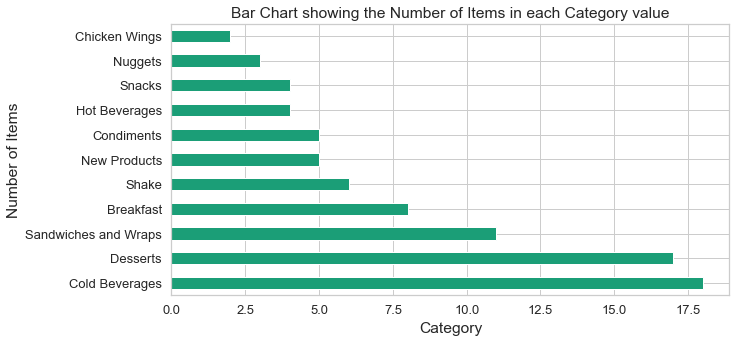

In [54]:
#df_mcd['Category'].value_counts()

# Using pandas plot.bar function to plot the bar chart for the Category column of the dataframe df_mcd.

df_mcd['Category'].value_counts().plot.barh(figsize=(10,5),colormap='Dark2',fontsize=13,yticks=np.arange(0,19,1))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Category value')

# In order to save your plot into an image on your system, use the following command.
# The image will be saved in the directory of this notebook.

#plt.savefig('barchart.png')   

In [46]:
df_store.describe()

,Postcode,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers
count,40.000000,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000
mean,282836.450000,77.452500,22.990000,4.947851e+06,9.642409e+05,2.628607e+06,2.120508e+06,5.080997e+05,57.898762,11527.603992
std,211483.349642,0.456294,7.032554,2.536534e+06,8.024389e+05,8.081522e+05,1.087086e+06,5.361595e+05,21.137786,6764.091538
min,110001.000000,77.050000,12.910000,1.001099e+06,5.008549e+04,8.508667e+05,4.290423e+05,-1.107574e+06,25.009156,1002.929777
25%,110037.000000,77.117500,16.317500,2.682676e+06,2.613699e+05,2.000355e+06,1.149718e+06,4.177725e+05,39.022301,5487.136448
50%,122001.500000,77.220000,28.480000,4.968245e+06,7.974887e+05,3.009421e+06,2.129248e+06,7.357098e+05,58.068712,11581.987976
75%,515063.250000,77.617500,28.552500,6.873333e+06,1.465079e+06,3.331715e+06,2.945714e+06,8.622037e+05,73.944441,16662.221137
max,560095.000000,78.450000,28.690000,9.754173e+06,2.859645e+06,3.395053e+06,4.180360e+06,9.523763e+05,97.951445,24344.462416


In [47]:
df_store['City'].value_counts()

New Delhi    15
Bangalore    10
Gurgaon       7
Hyderabad     6
Delhi         2
Name: City, dtype: int64

Text(0.5, 1.0, 'Number of store in each City')

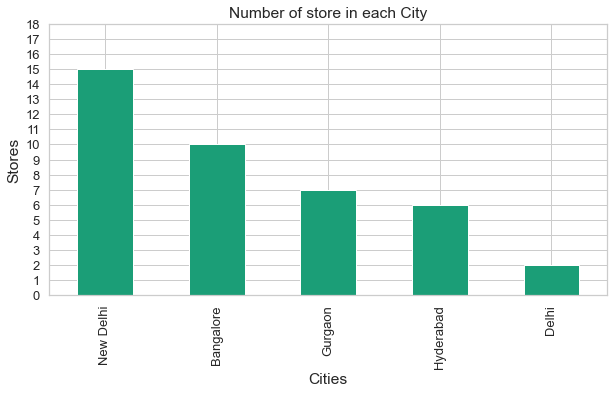

In [63]:
#plot.bar function to plot barchart for df_store for city column

df_store['City'].value_counts().plot(kind='bar',figsize=(10,5),colormap='Dark2',fontsize=13,yticks=np.arange(0,19,1))

plt.xlabel('Cities')
plt.ylabel('Stores')
plt.title('Number of store in each City')

In [65]:
df_mcd.Energy.value_counts()

281    2
185    2
0      2
299    2
166    1
      ..
336    1
257    1
84     1
86     1
256    1
Name: Energy, Length: 79, dtype: int64

Text(0.5, 1.0, 'Energy in kcal')

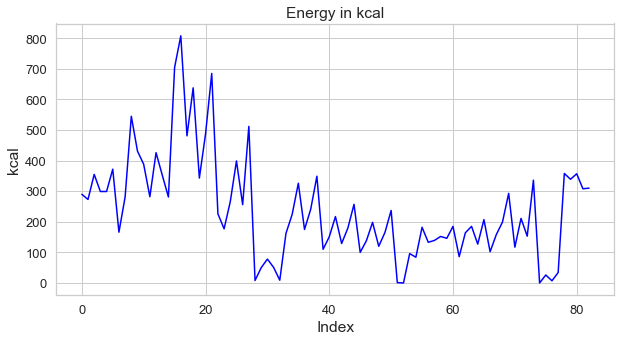

In [75]:
df_mcd.Energy.plot(kind='line', figsize=(10,5), color='blue', fontsize=13)

plt.xlabel('Index')
plt.ylabel('kcal')
plt.title('Energy in kcal')